In [ ]:
from google.colab import drive
from glob import glob
from sklearn.model_selection import train_test_split, StratifiedKFold
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, Dense, Activation, DepthwiseConv2D,Dropout
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
#from sklearn.utils import class_weight
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
glob('/content/gdrive/MyDrive/ROIJPG (2)/*G*/*')

['/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_446.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_445.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_436.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_443.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_441.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_442.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_444.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_438.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_439.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_440.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_435.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_437.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_426.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_430.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_427.jpeg',
 '/content/gdrive/MyDrive/ROIJPG (2)/G1/نسخة من g1_429.jpeg',
 '/conte

In [ ]:
len(glob('/content/gdrive/MyDrive/ROIJPG (2)/*G*/*'))

1268

In [ ]:
# Paths to the dataset
Grade_1 = glob('/content/gdrive/MyDrive/ROIJPG (2)/G1*/*')
Grade_2 = glob('/content/gdrive/MyDrive/ROIJPG (2)/G2*/*')
Grade_3 = glob('/content/gdrive/MyDrive/ROIJPG (2)/G3*/*')

In [ ]:
print ("Grade_1: ",len(Grade_1))
print ("Grade_2: ",len(Grade_2))
print ("Grade_3: ",len(Grade_3))

Grade_1:  446
Grade_2:  376
Grade_3:  446


In [ ]:
import random
def apply_horizontal_flip(image):
    flipped_image = cv2.flip(image, 1)  # Flip horizontally
    return flipped_image

def apply_vertical_flip(image):
    flipped_image = cv2.flip(image, 0)  # Flip vertically
    return flipped_image

def apply_brightness_adjustment(image):
    # Randomly adjust brightness by scaling pixel values
    alpha = 1.0 + random.uniform(-0.2, 0.2)  # Scale factor
    adjusted_image = cv2.multiply(image, np.array([alpha]))  # Multiply pixel values by scale factor
    return adjusted_image


In [ ]:
def read_and_preprocess_images(file_paths, num_images_per_file, resize_dim=(224, 224), augmentation=False):
    images = []

    for file_path in file_paths:
        if os.path.isfile(file_path) and file_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

                if augmentation:
                    # Apply brightness, horizontal and vertical flipping augmentation
                    flipped_horizontal_img = apply_horizontal_flip(img)
                    flipped_vertical_img = apply_vertical_flip(img)
                    brightness_adjusted_img = apply_brightness_adjustment(img)

                    # Resize augmented images
                    resized_horizontal_img = cv2.resize(flipped_horizontal_img, resize_dim)
                    resized_vertical_img = cv2.resize(flipped_vertical_img, resize_dim)
                    resized_brightness_adjusted_img = cv2.resize(brightness_adjusted_img, resize_dim)

                    # Append augmented images to the list
                    images.extend([resized_horizontal_img, resized_vertical_img, resized_brightness_adjusted_img])

                # Append original image as well
                resized_img = cv2.resize(img, resize_dim)
                images.append(resized_img)

    return np.array(images)

In [ ]:
# Paths to the dataset for each grade
Grade_1_paths = glob('/content/gdrive/MyDrive/ROIJPG (2)/G1*/*')
Grade_2_paths = glob('/content/gdrive/MyDrive/ROIJPG (2)/G2*/*')
Grade_3_paths = glob('/content/gdrive/MyDrive/ROIJPG (2)/G3*/*')


In [ ]:
# Load and preprocess images for Grade 1
images_grade_1 = read_and_preprocess_images(Grade_1_paths, num_images_per_file=446)

# Load and preprocess images for Grade 3
images_grade_3 = read_and_preprocess_images(Grade_3_paths, num_images_per_file=446)

# Load and preprocess images for Grade 2 with brightness, horizontal and vertical flipping augmentation
images_grade_2 = read_and_preprocess_images(Grade_2_paths, num_images_per_file=376, augmentation=True)

In [ ]:
# Trim Grade 2 to have exactly 446 images
images_grade_2 = images_grade_2[:446]
print("Grade 1 images:", len(images_grade_1))
print("Grade 2 images:", len(images_grade_2))
print("Grade 3 images:", len(images_grade_3))

Grade 1 images: 446
Grade 2 images: 446
Grade 3 images: 446


In [ ]:
# Concatenate images and create labels
images = np.concatenate((images_grade_1, images_grade_2, images_grade_3), axis=0)
labels = np.array([0]*len(images_grade_1) + [1]*len(images_grade_2) + [2]*len(images_grade_3))

# Shuffle the data
images, labels = shuffle(images, labels, random_state=42)

# Perform one-hot encoding on labels
labels = to_categorical(labels)

# Normalize pixel values
images = images.astype('float32') / 255.0

In [ ]:
pip install tensorflow-hub


In [ ]:
import tensorflow_hub as hub

# Define input shape
input_shape = (224, 224, 3)

# Define the input layer
input_layer = tf.keras.layers.Input(shape=input_shape, name='input_layer')

# Load MobileNetV3 model from TensorFlow Hub
module_handle = 'https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5'
base_model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    hub.KerasLayer(module_handle, trainable=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units for classification
])
# Print model summary
base_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              2555993   
                                                                 
 batch_normalization (Batch  (None, 1001)              4004      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 512)               513024    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [ ]:
# Compile the model
base_model.compile(optimizer=Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Define the number of folds for cross-validation
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

In [ ]:
# Perform K-fold cross-validation
fold_index = 1
for train_index, val_index in kfold.split(images, np.argmax(labels, axis=1)):
    print(f'Fold {fold_index}/{num_folds}:')

    # Split data into train and validation sets for this fold
    trainX_fold, valX_fold = images[train_index], images[val_index]
    trainY_fold, valY_fold = labels[train_index], labels[val_index]

    # Train the model
    history = base_model.fit(trainX_fold, trainY_fold,
                             validation_data=(valX_fold, valY_fold),
                             epochs=70, batch_size=32, callbacks=[early_stopping])

    # Evaluate the model
    loss, accuracy = base_model.evaluate(valX_fold, valY_fold)
    print(f'Validation Accuracy: {accuracy:.4f}')

    # Predict probabilities for validation set
    y_pred_prob = base_model.predict(valX_fold)

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Convert one-hot encoded labels back to original labels
    y_true = np.argmax(valY_fold, axis=1)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Store evaluation metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

    fold_index += 1

# Calculate average evaluation metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)



Fold 1/5:
Epoch 1/70
34/34 [==============================] - 79s 2s/step - loss: 1.8562 - accuracy: 0.4308 - val_loss: 1.6600 - val_accuracy: 0.3321
Epoch 2/70
34/34 [==============================] - 52s 2s/step - loss: 1.4307 - accuracy: 0.5766 - val_loss: 2.1460 - val_accuracy: 0.3321
Epoch 3/70
34/34 [==============================] - 51s 2s/step - loss: 1.2802 - accuracy: 0.6393 - val_loss: 2.2905 - val_accuracy: 0.3321
Epoch 4/70
34/34 [==============================] - 51s 1s/step - loss: 1.1167 - accuracy: 0.7187 - val_loss: 2.3003 - val_accuracy: 0.3396
Epoch 5/70
34/34 [==============================] - 50s 1s/step - loss: 1.0157 - accuracy: 0.7738 - val_loss: 2.5443 - val_accuracy: 0.3321
Epoch 6/70
34/34 [==============================] - 51s 1s/step - loss: 0.8866 - accuracy: 0.8280 - val_loss: 2.9401 - val_accuracy: 0.3321
Epoch 7/70
34/34 [==============================] - 51s 1s/step - loss: 0.8623 - accuracy: 0.8374 - val_loss: 3.3411 - val_accuracy: 0.3321
Epoch 8/70

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/70
34/34 [==============================] - 52s 2s/step - loss: 1.6181 - accuracy: 0.5131 - val_loss: 2.1400 - val_accuracy: 0.3358
Epoch 2/70
34/34 [==============================] - 51s 2s/step - loss: 1.2703 - accuracy: 0.6402 - val_loss: 2.5211 - val_accuracy: 0.3433
Epoch 3/70
34/34 [==============================] - 52s 2s/step - loss: 1.0864 - accuracy: 0.7374 - val_loss: 3.2003 - val_accuracy: 0.3433
Epoch 4/70
34/34 [==============================] - 51s 2s/step - loss: 0.9489 - accuracy: 0.8047 - val_loss: 3.6028 - val_accuracy: 0.3358
Epoch 5/70
34/34 [==============================] - 51s 1s/step - loss: 0.8883 - accuracy: 0.8206 - val_loss: 3.2873 - val_accuracy: 0.3507
Epoch 6/70
34/34 [==============================] - 52s 2s/step - loss: 0.7684 - accuracy: 0.8785 - val_loss: 3.6511 - val_accuracy: 0.3321
Epoch 7/70
34/34 [==============================] - 51s 2s/step - loss: 0.6921 - accuracy: 0.9093 - val_loss: 4.6563 - val_accuracy: 0.3358
Epoch 8/70
34/34 [==

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/70
34/34 [==============================] - 52s 2s/step - loss: 1.4035 - accuracy: 0.6065 - val_loss: 2.4261 - val_accuracy: 0.3358
Epoch 2/70
34/34 [==============================] - 51s 2s/step - loss: 1.1234 - accuracy: 0.7112 - val_loss: 3.1740 - val_accuracy: 0.3097
Epoch 3/70
34/34 [==============================] - 53s 2s/step - loss: 0.9673 - accuracy: 0.7841 - val_loss: 3.7776 - val_accuracy: 0.3358
Epoch 4/70
34/34 [==============================] - 51s 2s/step - loss: 0.8610 - accuracy: 0.8280 - val_loss: 4.1732 - val_accuracy: 0.3619
Epoch 5/70
34/34 [==============================] - 48s 1s/step - loss: 0.7748 - accuracy: 0.8720 - val_loss: 4.6369 - val_accuracy: 0.3731
Epoch 6/70
34/34 [==============================] - 50s 1s/step - loss: 0.7541 - accuracy: 0.8832 - val_loss: 5.3213 - val_accuracy: 0.3172
Epoch 7/70
34/34 [==============================] - 51s 2s/step - loss: 0.6288 - accuracy: 0.9280 - val_loss: 5.4557 - val_accuracy: 0.3358
Epoch 8/70
34/34 [==

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/70
34/34 [==============================] - 50s 1s/step - loss: 1.2144 - accuracy: 0.6872 - val_loss: 2.8005 - val_accuracy: 0.3333
Epoch 2/70
34/34 [==============================] - 51s 2s/step - loss: 1.0231 - accuracy: 0.7526 - val_loss: 3.2520 - val_accuracy: 0.3221
Epoch 3/70
34/34 [==============================] - 50s 1s/step - loss: 0.8446 - accuracy: 0.8319 - val_loss: 3.1894 - val_accuracy: 0.3745
Epoch 4/70
34/34 [==============================] - 51s 2s/step - loss: 0.7751 - accuracy: 0.8721 - val_loss: 3.4153 - val_accuracy: 0.3371
Epoch 5/70
34/34 [==============================] - 51s 2s/step - loss: 0.6930 - accuracy: 0.8982 - val_loss: 4.5937 - val_accuracy: 0.3221
Epoch 6/70
34/34 [==============================] - 48s 1s/step - loss: 0.6248 - accuracy: 0.9365 - val_loss: 4.3855 - val_accuracy: 0.3221
Epoch 7/70
34/34 [==============================] - 50s 1s/step - loss: 0.6092 - accuracy: 0.9374 - val_loss: 4.2133 - val_accuracy: 0.3146
Epoch 8/70
34/34 [==

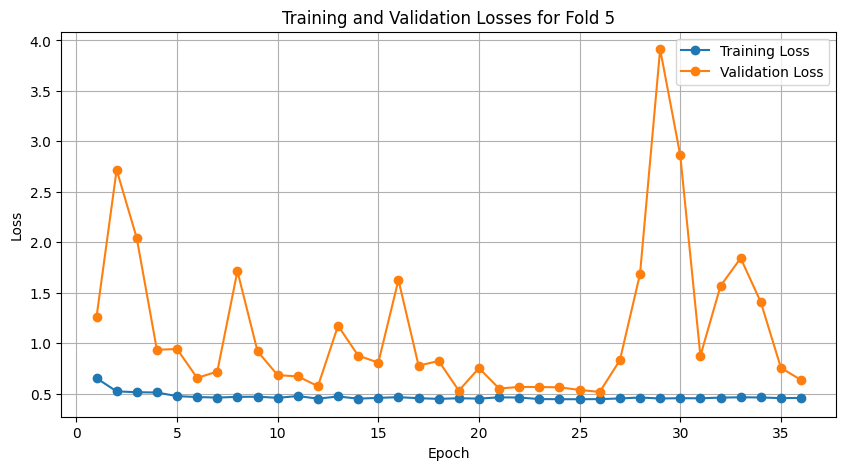

In [ ]:
import matplotlib.pyplot as plt

# Define epochs and corresponding metrics for fold 5
epochs = list(range(1, 37))  # Adjust the range based on the total number of epochs
training_losses = [
    0.6545, 0.5243, 0.5157, 0.5130, 0.4769, 0.4681, 0.4628, 0.4697, 0.4713, 0.4604,
    0.4775, 0.4523, 0.4734, 0.4522, 0.4599, 0.4666, 0.4566, 0.4498, 0.4562, 0.4525,
    0.4650, 0.4634, 0.4480, 0.4465, 0.4464, 0.4474, 0.4541, 0.4631, 0.4536, 0.4569,
    0.4555, 0.4624, 0.4655, 0.4638, 0.4573, 0.4591
]
validation_losses = [
    1.2583, 2.7182, 2.0416, 0.9362, 0.9436, 0.6574, 0.7204, 1.7147, 0.9208, 0.6848,
    0.6727, 0.5755, 1.1737, 0.8786, 0.8087, 1.6278, 0.7793, 0.8250, 0.5313, 0.7545,
    0.5524, 0.5679, 0.5675, 0.5640, 0.5385, 0.5186, 0.8327, 1.6855, 3.9128, 2.8617,
    0.8762, 1.5681, 1.8438, 1.4085, 0.7573, 0.6365
]
training_accuracies = [
    0.9421, 0.9711, 0.9748, 0.9785, 0.9869, 0.9925, 0.9935, 0.9888, 0.9897, 0.9963,
    0.9879, 0.9972, 0.9888, 0.9963, 0.9944, 0.9925, 0.9953, 0.9981, 0.9935, 0.9935,
    0.9925, 0.9888, 0.9991, 0.9972, 0.9981, 0.9972, 0.9953, 0.9879, 0.9972, 0.9916,
    0.9925, 0.9935, 0.9907, 0.9888, 0.9935, 0.9953
]
validation_accuracies = [
    0.8839, 0.6779, 0.7790, 0.8876, 0.9663, 0.9288, 0.9101, 0.7528, 0.8614, 0.9326,
    0.9213, 0.9588, 0.7978, 0.8689, 0.8914, 0.6779, 0.8989, 0.8989, 0.9775, 0.9064,
    0.9888, 0.9588, 0.9775, 0.9850, 0.9850, 0.9850, 0.9850, 0.9139, 0.7828, 0.5056,
    0.5281, 0.8839, 0.7116, 0.6779, 0.7790, 0.8876, 0.9663
]

# Plot training and validation losses for fold 5
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_losses, marker='o', label='Training Loss')
plt.plot(epochs, validation_losses, marker='o', label='Validation Loss')
plt.title('Training and Validation Losses for Fold 5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


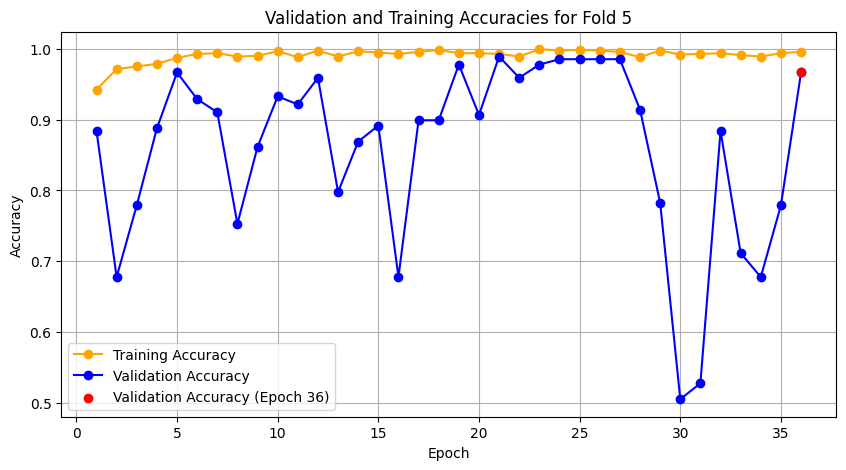

In [ ]:
import matplotlib.pyplot as plt

# Define epochs and corresponding metrics for fold 5
epochs = list(range(1, 37))  # Adjust the range based on the total number of epochs

# Plot validation and training accuracies
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracies, label='Training Accuracy', color='orange', marker='o')
plt.plot(epochs[:36], validation_accuracies[:36], label='Validation Accuracy', color='blue', marker='o')
plt.scatter(36, 0.9663, color='red', label='Validation Accuracy (Epoch 36)', zorder=5)
plt.title('Validation and Training Accuracies for Fold 5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Print evaluation metrics
print("Evaluation Metrics:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.9850
Precision: 0.9852
Recall: 0.9850
F1 Score: 0.9850

Confusion Matrix:
[[87  0  2]
 [ 0 89  0]
 [ 0  2 87]]


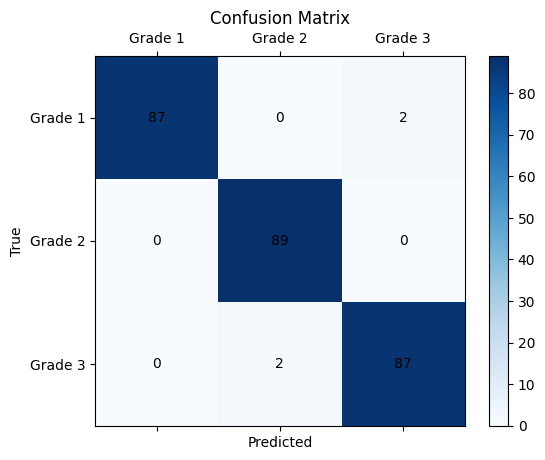

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Define the confusion matrix
conf_matrix = np.array([[87, 0, 2],
                        [0, 89, 0],
                        [0, 2, 87]])


# Plot the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
fig.colorbar(cax)

# Add labels to the axes
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Grade 1', 'Grade 2', 'Grade 3'])
ax.set_yticklabels(['Grade 1', 'Grade 2', 'Grade 3'])

# Add text annotations for each cell in the confusion matrix
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, val, ha='center', va='center', color='black')

plt.show()


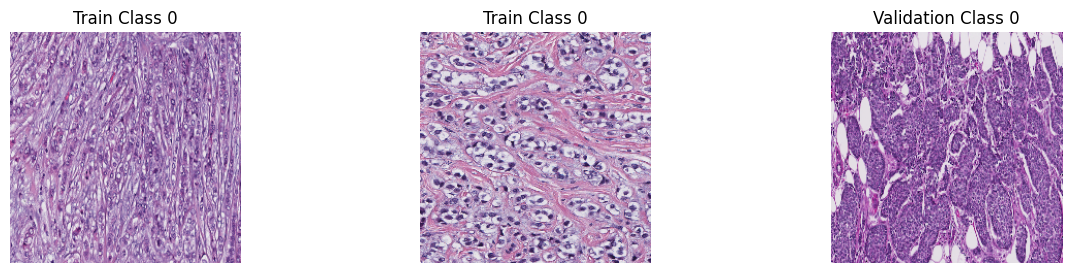

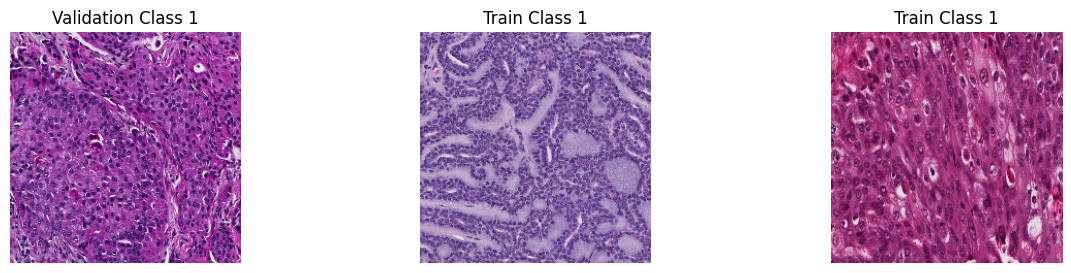

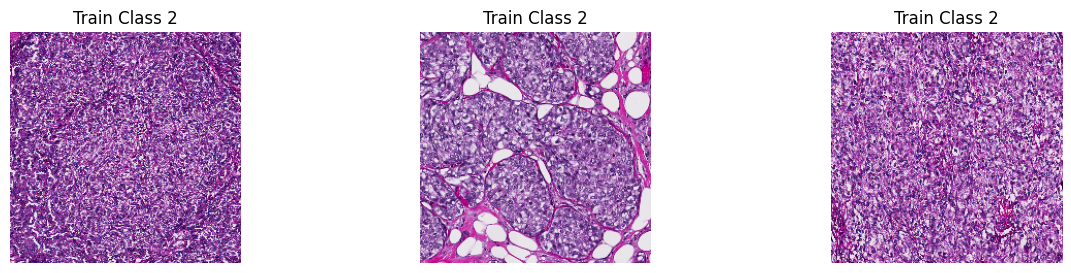

In [ ]:
def display_sample_images(train_images, train_labels, val_images, val_labels, num_samples_per_class=3):
    # Combine training and validation data
    images = np.concatenate((train_images, val_images), axis=0)
    labels = np.concatenate((train_labels, val_labels), axis=0)

    # Get the number of classes
    num_classes = np.max(labels) + 1

    # Initialize a list to store indices of each class
    class_indices = [[] for _ in range(num_classes)]

    # Store the indices of each class
    for i, label in enumerate(labels):
        class_indices[label].append(i)

    # Shuffle the indices of each class
    for indices in class_indices:
        np.random.shuffle(indices)

    # Display sample images for each class
    for cls in range(num_classes):
        # Get sample indices for the current class
        sample_indices = class_indices[cls][:num_samples_per_class]

        # Display sample images
        plt.figure(figsize=(15, 3))
        for i, index in enumerate(sample_indices):
            plt.subplot(1, num_samples_per_class, i+1)
            if index < len(train_images):
                plt.imshow(train_images[index])
                plt.title(f'Train Class {cls}')
            else:
                plt.imshow(val_images[index - len(train_images)])
                plt.title(f'Validation Class {cls}')
            plt.axis('off')
        plt.show()

#displaygg
display_sample_images(trainX_fold, np.argmax(trainY_fold, axis=1), valX_fold, np.argmax(valY_fold, axis=1))


In [ ]:
pip install tensorflow

In [ ]:
# Define the labels
labels = ['Grade_1', 'Grade_2', 'Grade_3']

# Define the file path
file_path = 'labels.txt'

# Write the labels to the text file
with open(file_path, 'w') as file:
    for label in labels:
        file.write(label + '\n')

print(f'Labels saved to {file_path}')


Labels saved to labels.txt


In [ ]:
# Save the trained model in the SavedModel format
tf.saved_model.save(base_model, 'base_model_saved_model')

# Convert the SavedModel to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model('base_model_saved_model')
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('classifier_modelhb.tflite', 'wb') as f:
    f.write(tflite_model)

print('TFLite model saved successfully.')


TFLite model saved successfully.
